### Pollution de l'air

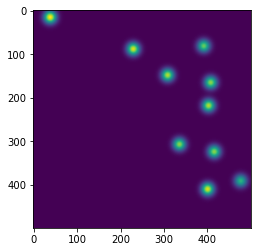

In [17]:
import pandas as pd
import numpy as np
from grid import x, y
import matplotlib.pyplot as plt

def find_nearest(array, value):
    
    """
    Trouve l'indice du point le plus près d'une valeur donnée dans un array donné

    ### Paramètres
    array: Le array dans lequel chercher l'indice
    value: La valeur pour laquelle on veut trouver le point le plus proche
    
    ### Retourne
    idx: L'indice du point le plus près de la valeur donnée
    
    """
    
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    
    return idx


# Reading the data

data = pd.read_csv("../Data/air_pollution/rsqa-indice-qualite-air-station.csv",delimiter=",")

stationId = data["stationId"]
longitude = data["longitude"]
latitude = data["latitude"]
polluant = data["polluant"]
quantite = data["valeur"] #De 0 à 500

air_pollution_dict = dict()
air_pollution_dict["x"] = np.zeros(len(stationId))
air_pollution_dict["y"] = np.zeros(len(stationId))
air_pollution_dict["valeur"] = np.zeros(len(stationId))

grid_x, grid_y = np.mgrid[0:len(x):500j, 0:len(y):500j]
grid = np.zeros((len(x),len(y)))

for i in range(len(stationId)): 

    #On trouve l'élément de la grid le plus proche de l'emplacement du stationId
    i_Xgrid = find_nearest(latitude[i],x)
    i_Ygrid = find_nearest(longitude[i],y)
    
    #On trouve la quantité de polluant
    valeur = quantite[i]
    air_pollution_dict["valeur"][i] = valeur
    
    sigma_x, sigma_y = 10, 10
    A = valeur
    grid += A * np.exp(-(((grid_x - i_Xgrid)**2 / (2 * sigma_x**2)) + ((grid_y - i_Ygrid)**2 / (2 * sigma_y**2))))
    
air_pollution_dict["grid"] = grid


############################
plt.imshow(grid)


In [4]:
from point_object import point

test = point(234,100,0)


4.6591226316113604e-82

### Implémentation des points

In [2]:
from point_object import point

test_point = point(7853,9553,1)
test_point.pollution_air

(array([0], dtype=int64),)


array([11.])

In [3]:
from reading_air_pollution import air_pollution_dict

print(air_pollution_dict)

{'x': array([7853., 6511., 6176., 2988., 3323., 8229., 1780., 4398.,  311.,
       1651.]), 'y': array([9553., 8344., 6740., 6197., 8181., 8037., 4618., 8074.,  780.,
       7859.]), 'valeur': array([11., 14., 14., 15., 14., 16., 16., 15., 17., 13.])}


In [4]:
import matplotlib.pyplot as plt

grid = np.zeros((10000,10000))
x = (air_pollution_dict["x"])
y = (air_pollution_dict["y"])

for j in range(len(x)):
    grid[int(x[j])][int(y[j])] = air_pollution_dict["valeur"][j]
    


### Température

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("../Data/temperature/temp_data_2021.csv",delimiter=",")

temp = data["Mean Temp (°C)"]
precipitation= data["Total Precip (mm)"]


0       1.0
1      11.4
2       0.0
3       0.6
4       0.0
       ... 
360     0.0
361     2.0
362     0.0
363     0.6
364     0.2
Name: Total Snow (cm), Length: 365, dtype: float64

### Ilots de chaleur

Calcul de la dimension réelle de la maille

In [7]:
nb_dim = 500
print(f"Une case est de {np.round(np.sqrt(472.6/nb_dim**2)*1000,0)} m par {np.round(np.sqrt(472.6/nb_dim**2)*1000,0)} m")

Une case est de 43.0 m par 43.0 m
